In [1]:
import numpy as np
import matplotlib.pyplot as pl

In [2]:
def FFT_ACF(x, return_half=True, axis=-1, **kwargs):
    """Compute the autocorrelation function (ACF) of `x` using NumPy's
    fast Fourier transform.  By default, only returns half the ACF.
    For the full ACF, use `return_half=False`.

    Extra keyword arguments are passed to `numpy.fft.fft` and
    `numpy.fft.ifft`.

    """
    F = np.fft.fft(x, axis=axis, **kwargs)
    if return_half:
        acf = np.real(np.fft.ifft(F*np.conj(F), axis=axis, **kwargs))[:len(F)//2]
        return acf
    else:
        acf = np.real(np.fft.ifft(F*np.conj(F), axis=axis, **kwargs))
        return acf

Let's experiment with the statistics of auto-correlation functions.

In [ ]:
K = 300     # length of each timeseries, 4x the length of ACF
N = 10000  # number of samples
X = np.random.randn(K, N)
P = np.abs(np.fft.rfft(X, axis=0))**2
P = P - np.mean(P, axis=0)
A = FFT_ACF(P, return_half=True, axis=0)
#A /= np.amax(A, axis = 0)
c = np.corrcoef(A)

In [ ]:
X.shape, P.shape, A.shape

In [ ]:
pl.imshow(c);

In [ ]:
print(np.mean(A, axis=1))
print(np.std(A, axis=1))

In [ ]:
print(c) # the mysterious 0.8

In [4]:
# Ks = np.arange(20, 1001, 30)
Ks = np.array([10, 15, 25, 40, 65])
Ks = np.hstack([Ks, Ks*10, 1000])
print(Ks)

[  10   15   25   40   65  100  150  250  400  650 1000]


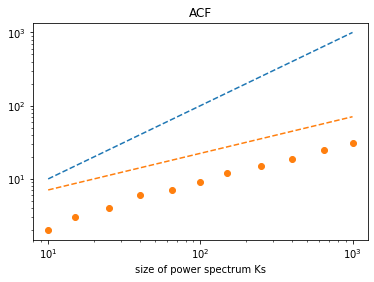

In [6]:
means = Ks*0
stds = Ks*0

N = 10000  # number of samples

for i, K in enumerate(Ks):
    p = np.random.exponential(size=(K, N))         # make N power spectra of length K
    p -= np.mean(p, axis = 0)
    A = FFT_ACF(p, return_half=True, axis=0)       # compute their ACFs
    means[i] = np.median(np.mean(A[1:], axis=1))   # median mean of the ACFs
    stds[i] = np.median(np.std(A[1:], axis=1))     # median stdev of ACFs

pl.loglog(Ks, means, 'o', color='C0', label='means')
pl.loglog(Ks, Ks, '--', color='C0')               # mean is on average equal to length K
pl.loglog(Ks, stds, 'o', color='C1', label='stds')
pl.loglog(Ks, np.sqrt(5*Ks), '--', color='C1')    # variance is on average equal to 5*K
pl.xlabel('size of power spectrum Ks')
pl.title('ACF');

In [ ]:
means = 0*Ks
stds = 0*Ks

for i, K in enumerate(Ks):
    p = np.random.exponential(size=(K, N))    # make N power spectra of length K
    A = FFT_ACF(p, return_half=True, axis=0)  # compute their ACFs
    X = np.sum(A, axis=0)                     # collapse them
    means[i] = np.mean(X)                     # mean of collapsed ACF
    stds[i] = np.std(X)                       # stdev of collapsed ACF

pl.loglog(Ks, means, 'o', color='C0')
pl.loglog(Ks, Ks**2/2, '--', color='C0')      # mean of ACF = length K**2/2
pl.loglog(Ks, stds, 'o', color='C1')
# pl.loglog(Ks, 1.2*Ks**1.5, '--', color='C1')
pl.loglog(Ks, np.sqrt((Ks + Ks*(Ks-1)*0.8)*(3.*Ks/2.)), '-.', color='C1') # variance of ACF is (K+K(K-1)*0.8)*(3*K/2)
pl.xlabel('size of power spectrum')
pl.title('summed ACF');

In [ ]:
np.shape(X)

In [ ]:
pl.plot(A[:,0])

In [ ]:
def get_one_ACF_mu_cov(ACF):
    N = len(ACF)
    ones = np.ones(N-1)
    C = np.diag(ones)
    C = C[::-1]
    C += np.diag(ones)
    C[C>1] = 1
    C[C==0] = 0.8
    C *= 3*N
    return N, C

In [ ]:
N, C = get_one_ACF_mu_cov(A[:,0])

In [ ]:
pl.imshow(C)

In [ ]:
def get_summed_ACF_mu_cov(ACF, width=20):
    K = len(ACF)
    dN2 = (K + K*(K-1)*0.8)*(3.*K/2.)

    ones = np.ones(ACF.shape[0])
    frac = 1./width
    C = np.diag(ones)
    for i in range(1, width):
        C += np.diag(ones[:-i]*(1.-i*frac), i)
        C += np.diag(ones[:-i]*(1.-i*frac), -i)

    return 2*K**2, C*dN2

In [ ]:
N, C = get_summed_ACF_mu_cov(A, width=2)

In [ ]:
pl.imshow(C)